In [3]:
#PageRank

In [4]:
library('igraph')
library('Matrix')
library('pracma')

In [5]:
g1 = sample_pa(1000, m = 4, directed = TRUE)

In [6]:
g2 = sample_pa(1000, m = 4, directed = TRUE)

In [7]:
gsize(g1)

[1] 3990

In [8]:
gsize(g2)

[1] 3990

In [9]:
perm = sample(vcount(g2))

In [10]:
g2 = permute(g2, perm)

In [11]:
as_edgelist(g2)

149,862
518,862
518,149
506,862
506,149
506,518
2,862
2,149
2,518
2,506
711,862


In [12]:
neighbors(g2, 1)

+ 4/1000 vertices, from c71d64e:
[1]   2 149 518 862

In [13]:
g3 = add_edges(g1, as.vector(t(as_edgelist(g2))))

In [14]:
neighbors(g3, 1)

+ 4/1000 vertices, from c739cf9:
[1]   2 149 518 862

In [15]:
assert <- function(val1, val2) {
    if(val1 == val2)
        return (TRUE)
        
    else
        return (FALSE)
}

In [16]:
assert(3990 + 3990, gsize(g3))

[1] TRUE

In [17]:
gsize(g3)

[1] 7980

In [18]:
create_transition_matrix = function (g){
    
    # WARNING: make sure your graph is connected (you might input GCC of your graph)
    print(g)
    vs = V(g)
    n = vcount(g)
    adj = as_adjacency_matrix(g)
    print(adj)
    adj[diag(rowSums(adj) == 0)] = 1  # handle if the user is using the function for networks with isolated nodes by creating self-edges
    z = matrix(rowSums(adj, , 1))
    
    transition_matrix = adj / repmat(z, 1, n)  # normalize to get probabilities
    
    return(transition_matrix)
}

In [19]:
gen_random_walk <- function(g, start_node, steps, transition_matrix){
    
    count <- seq(0, 0, length.out = 1000)
    print (count)
    count[start_node] <- 1
    node <- start_node
    for(i in 1:steps){
        PMF = transition_matrix[node, ]
        next_node = sample(1:vcount(g), 1, prob = PMF)
        node=next_node
        count[node] <- count[node] + 1
    }
    return (count / steps)
}

In [20]:
visit_count = seq(0, 0, length.out = 1000)
print("Started")
transition_matrix <- create_transition_matrix(g3)
pb <- txtProgressBar(min = 0, max = 1000, style = 3)
for(i in seq(1, 1000)){
    visit_count = visit_count + gen_random_walk(g3, i, 1000, transition_matrix)
    setTxtProgressBar(pb, i)
}
visit_prob = visit_count / 1000
print(visit_prob)

[1] "Started"
IGRAPH c739cf9 D--- 1000 7980 -- Barabasi graph
+ attr: name (g/c), power (g/n), m (g/n), zero.appeal (g/n), algorithm
| (g/c)
+ edges from c739cf9:
 [1]  2-> 1  3-> 1  3-> 2  4-> 1  4-> 2  4-> 3  5-> 1  5-> 2  5-> 3  5-> 4
[11]  6-> 1  6-> 4  6-> 3  6-> 2  7-> 1  7-> 3  7-> 4  7-> 2  8-> 7  8-> 2
[21]  8-> 3  8-> 4  9-> 1  9-> 3  9-> 5  9-> 2 10-> 1 10-> 2 10-> 4 10-> 7
[31] 11->10 11-> 1 11-> 9 11-> 3 12-> 4 12-> 1 12-> 3 12->10 13->12 13-> 3
[41] 13-> 4 13-> 2 14-> 9 14->10 14-> 1 14-> 2 15-> 5 15-> 3 15-> 8 15-> 7
[51] 16->10 16-> 2 16-> 7 16-> 6 17->12 17-> 1 17-> 2 17->15 18->12 18-> 3
[61] 18-> 2 18-> 4 19-> 2 19->13 19->12 19-> 1 20-> 2 20->12 20-> 3 20-> 7
+ ... omitted several edges
1000 x 1000 sparse Matrix of class "dgCMatrix"
                                                                              
   [1,] . 1 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . ......
   [2,] 1 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . ......


Warning message in plot.window(...):
""loops" is not a graphical parameter"Warning message in plot.window(...):
""mode" is not a graphical parameter"Warning message in plot.xy(xy, type, ...):
""loops" is not a graphical parameter"Warning message in plot.xy(xy, type, ...):
""mode" is not a graphical parameter"Warning message in axis(side = side, at = at, labels = labels, ...):
""loops" is not a graphical parameter"Warning message in axis(side = side, at = at, labels = labels, ...):
""mode" is not a graphical parameter"Warning message in axis(side = side, at = at, labels = labels, ...):
""loops" is not a graphical parameter"Warning message in axis(side = side, at = at, labels = labels, ...):
""mode" is not a graphical parameter"Warning message in box(...):
""loops" is not a graphical parameter"Warning message in box(...):
""mode" is not a graphical parameter"Warning message in title(...):
""loops" is not a graphical parameter"Warning message in title(...):
""mode" is not a graphical para

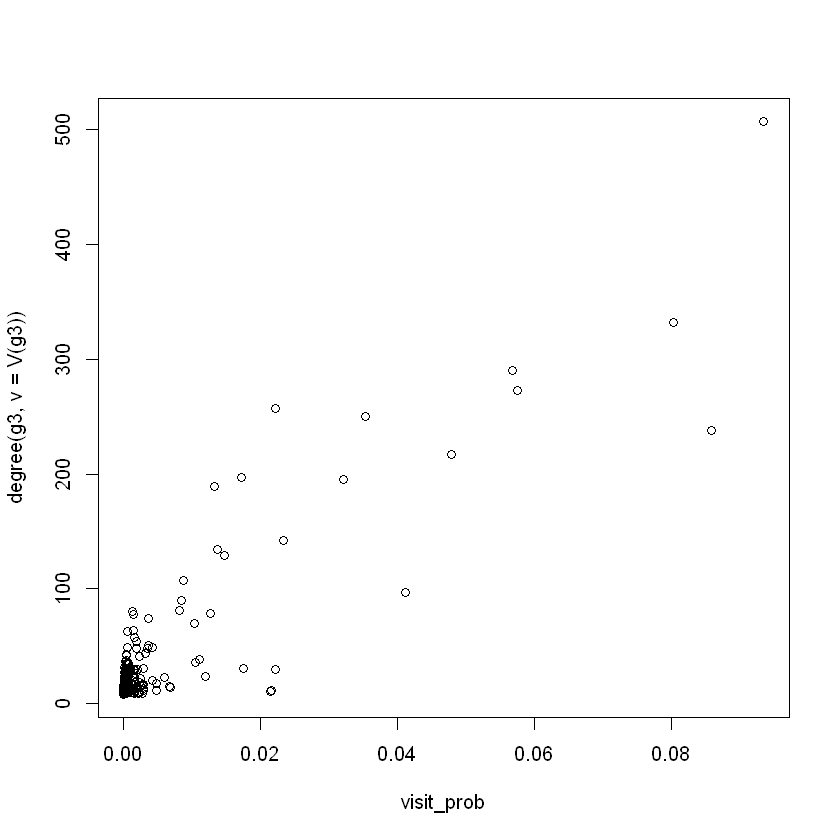

In [21]:
plot(visit_prob, degree(g3, v= V(g3)), loops=T,  mode='in')

Warning message in plot.window(...):
""loops" is not a graphical parameter"Warning message in plot.window(...):
""mode" is not a graphical parameter"Warning message in plot.xy(xy, type, ...):
""loops" is not a graphical parameter"Warning message in plot.xy(xy, type, ...):
""mode" is not a graphical parameter"Warning message in axis(side = side, at = at, labels = labels, ...):
""loops" is not a graphical parameter"Warning message in axis(side = side, at = at, labels = labels, ...):
""mode" is not a graphical parameter"Warning message in axis(side = side, at = at, labels = labels, ...):
""loops" is not a graphical parameter"Warning message in axis(side = side, at = at, labels = labels, ...):
""mode" is not a graphical parameter"Warning message in box(...):
""loops" is not a graphical parameter"Warning message in box(...):
""mode" is not a graphical parameter"Warning message in title(...):
""loops" is not a graphical parameter"Warning message in title(...):
""mode" is not a graphical para

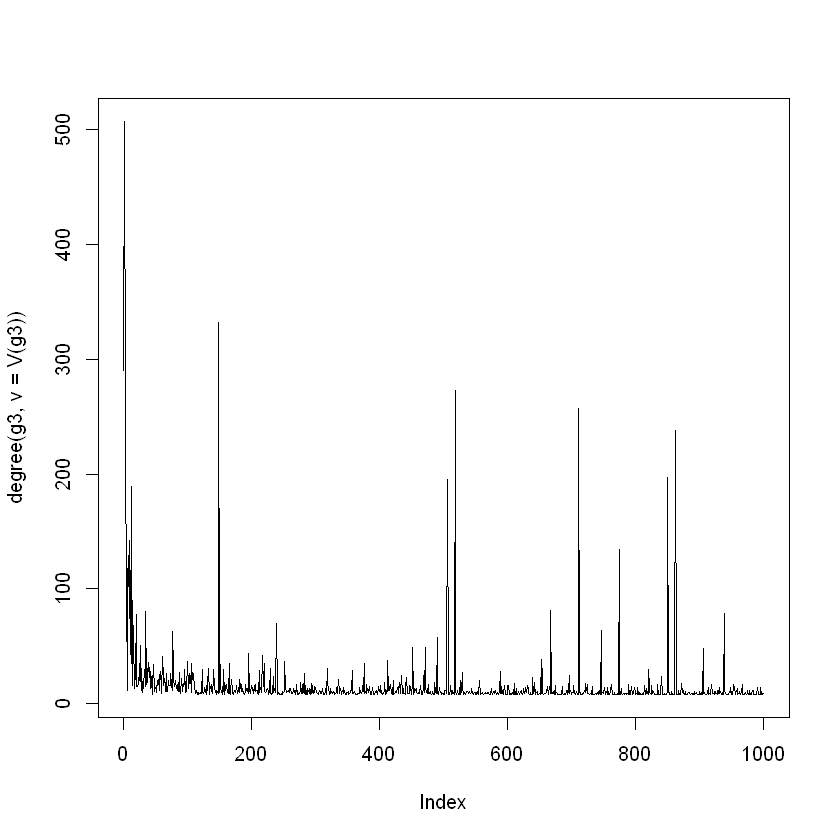

In [22]:
plot(degree(g3, v= V(g3)), loops=T,  mode='in', type= 'l')


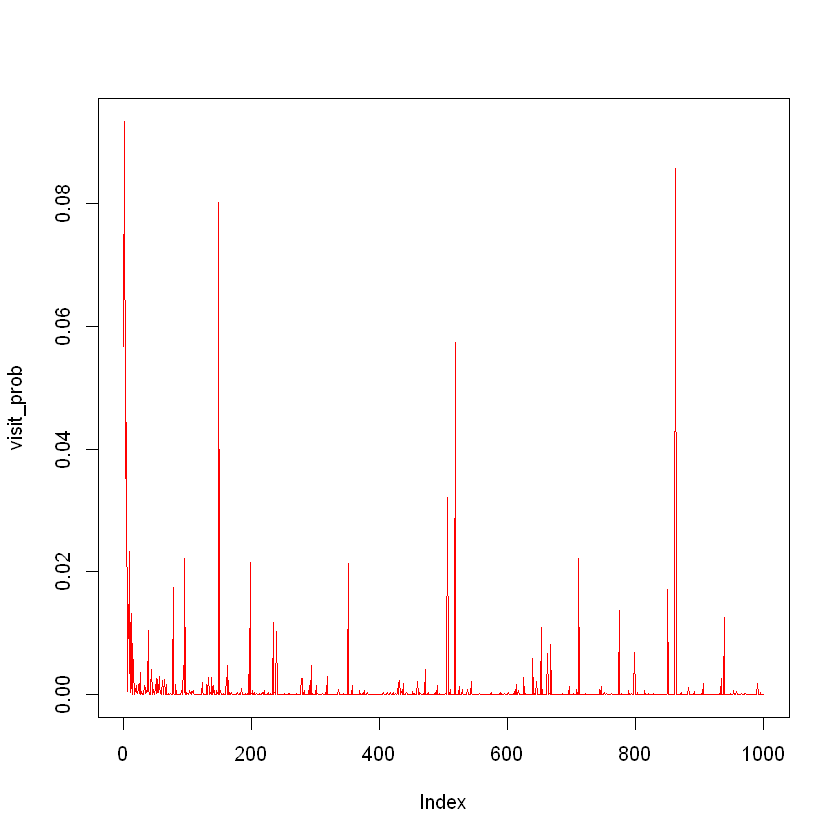

In [23]:
plot(visit_prob, col = "red", type = 'l')

In [24]:
########### 3b ##################

In [25]:
gen_random_walk_tele <- function(g, start_node, steps, alpha, transition_matrix){
    
    count <- seq(0, 0, length.out = 1000)
    #print (count)
    count[start_node] <- 1
    node <- start_node
    for(i in 1:steps){
        PMF = transition_matrix[node, ]
        PMF = (1 - alpha) * PMF + alpha * (1 / 1000)
        next_node = sample(1:vcount(g), 1, prob = PMF)
        node=next_node
        count[node] <- count[node] + 1
    }
    return (count / steps)
}

In [26]:
tele_visit_count = seq(0, 0, length.out = 1000)
print("Started")
transition_matrix <- create_transition_matrix(g3)
pb <- txtProgressBar(min = 0, max = 1000, style = 3)
for(i in seq(1, 1000)){
    tele_visit_count = tele_visit_count + gen_random_walk_tele(g3, i, 1000, 0.15, transition_matrix)
    setTxtProgressBar(pb, i)
}

[1] "Started"
IGRAPH c739cf9 D--- 1000 7980 -- Barabasi graph
+ attr: name (g/c), power (g/n), m (g/n), zero.appeal (g/n), algorithm
| (g/c)
+ edges from c739cf9:
 [1]  2-> 1  3-> 1  3-> 2  4-> 1  4-> 2  4-> 3  5-> 1  5-> 2  5-> 3  5-> 4
[11]  6-> 1  6-> 4  6-> 3  6-> 2  7-> 1  7-> 3  7-> 4  7-> 2  8-> 7  8-> 2
[21]  8-> 3  8-> 4  9-> 1  9-> 3  9-> 5  9-> 2 10-> 1 10-> 2 10-> 4 10-> 7
[31] 11->10 11-> 1 11-> 9 11-> 3 12-> 4 12-> 1 12-> 3 12->10 13->12 13-> 3
[41] 13-> 4 13-> 2 14-> 9 14->10 14-> 1 14-> 2 15-> 5 15-> 3 15-> 8 15-> 7
[51] 16->10 16-> 2 16-> 7 16-> 6 17->12 17-> 1 17-> 2 17->15 18->12 18-> 3
[61] 18-> 2 18-> 4 19-> 2 19->13 19->12 19-> 1 20-> 2 20->12 20-> 3 20-> 7
+ ... omitted several edges
1000 x 1000 sparse Matrix of class "dgCMatrix"
                                                                              
   [1,] . 1 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . ......
   [2,] 1 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . ......


In [27]:
tele_visit_count = tele_visit_count / 1000
print(tele_visit_count)

   [1] 0.044661 0.074694 0.029999 0.037309 0.029190 0.000736 0.009167 0.012899
   [9] 0.004426 0.019255 0.001071 0.013569 0.002447 0.000300 0.007172 0.003791
  [17] 0.000652 0.000251 0.001045 0.002797 0.000719 0.000491 0.001203 0.001463
  [25] 0.000473 0.003208 0.000621 0.000328 0.000984 0.000195 0.000365 0.000431
  [33] 0.001478 0.000482 0.002517 0.000540 0.001183 0.000746 0.007955 0.001203
  [41] 0.000740 0.000218 0.001268 0.003329 0.000126 0.001218 0.000999 0.000237
  [49] 0.000571 0.000962 0.001996 0.000400 0.000673 0.001785 0.000639 0.002199
  [57] 0.001197 0.000667 0.000429 0.000164 0.002163 0.000731 0.000293 0.001893
  [65] 0.000365 0.000207 0.001590 0.000269 0.000330 0.000412 0.000477 0.000402
  [73] 0.000363 0.000770 0.000298 0.000315 0.001798 0.012377 0.000612 0.000285
  [81] 0.000485 0.001621 0.000327 0.000220 0.000395 0.000271 0.000549 0.000374
  [89] 0.000199 0.000732 0.000831 0.000452 0.000271 0.003677 0.000500 0.014510
  [97] 0.000210 0.000665 0.000194 0.001049 0.000434 

Warning message in plot.window(...):
""loops" is not a graphical parameter"Warning message in plot.window(...):
""mode" is not a graphical parameter"Warning message in plot.xy(xy, type, ...):
""loops" is not a graphical parameter"Warning message in plot.xy(xy, type, ...):
""mode" is not a graphical parameter"Warning message in axis(side = side, at = at, labels = labels, ...):
""loops" is not a graphical parameter"Warning message in axis(side = side, at = at, labels = labels, ...):
""mode" is not a graphical parameter"Warning message in axis(side = side, at = at, labels = labels, ...):
""loops" is not a graphical parameter"Warning message in axis(side = side, at = at, labels = labels, ...):
""mode" is not a graphical parameter"Warning message in box(...):
""loops" is not a graphical parameter"Warning message in box(...):
""mode" is not a graphical parameter"Warning message in title(...):
""loops" is not a graphical parameter"Warning message in title(...):
""mode" is not a graphical para

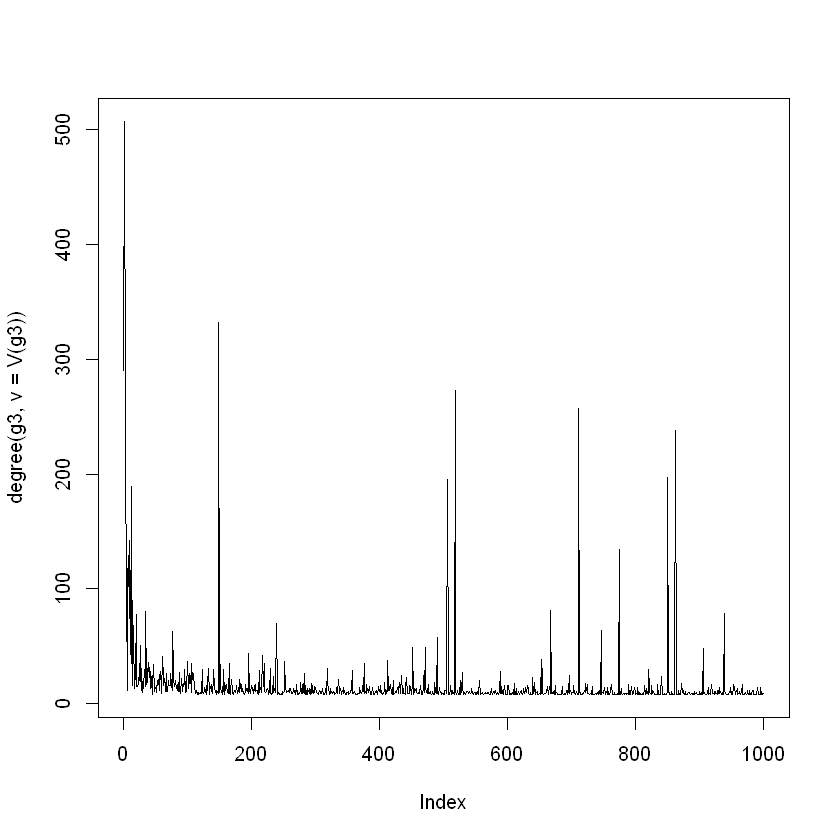

In [28]:
plot(degree(g3, v= V(g3)), loops=T,  mode='in', type= 'l')

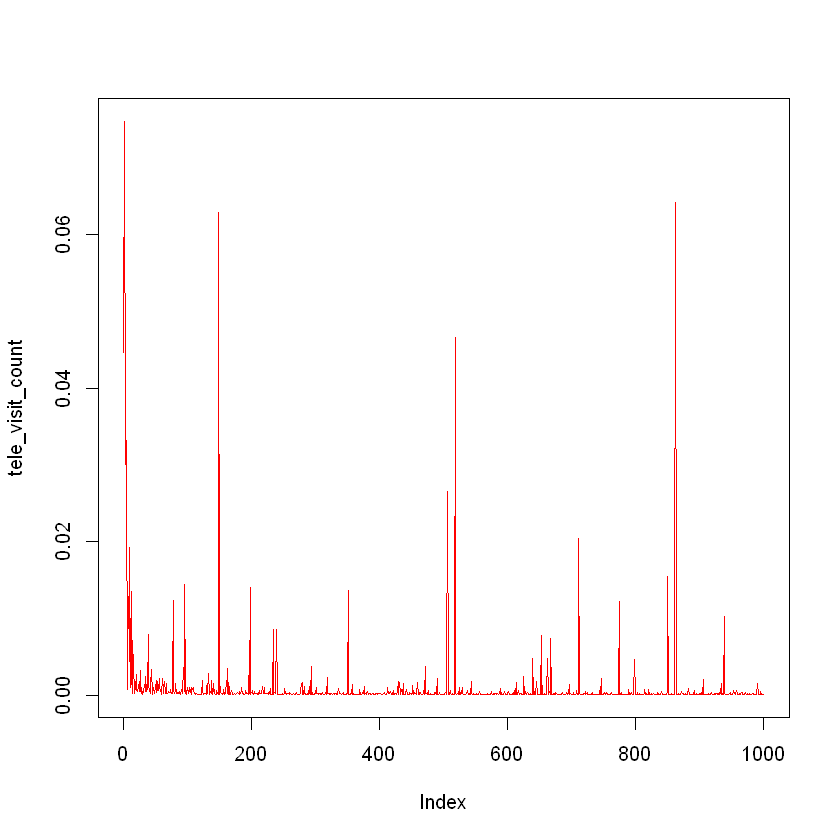

In [29]:
plot(tele_visit_count, col = "red", type = 'l')

In [30]:
print("Hi")

[1] "Hi"
